In [1]:
from pandas_datareader import data, wb
import seaborn as sns
import pandas as pd
import numpy as np
import datetime 
%matplotlib inline

In [2]:
bank_stocks=pd.read_pickle('all_banks')
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

In [3]:
#start = datetime.datetime(2006,1,1)
#end = datetime.datetime(2016,1,1)

In [4]:
#BAC =data.DataReader('BAC','google',start,end)

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [6]:
bank_stocks.columns.names=['Bank Ticker','Stock Info']

In [7]:
#bank_stocks.head()

In [8]:
bank_stocks.xs(key='Close', axis=1 ,level= 'Stock Info').max() 

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [9]:
returns = pd.DataFrame()

In [10]:
for tick in tickers:
    returns[tick+' return']=bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


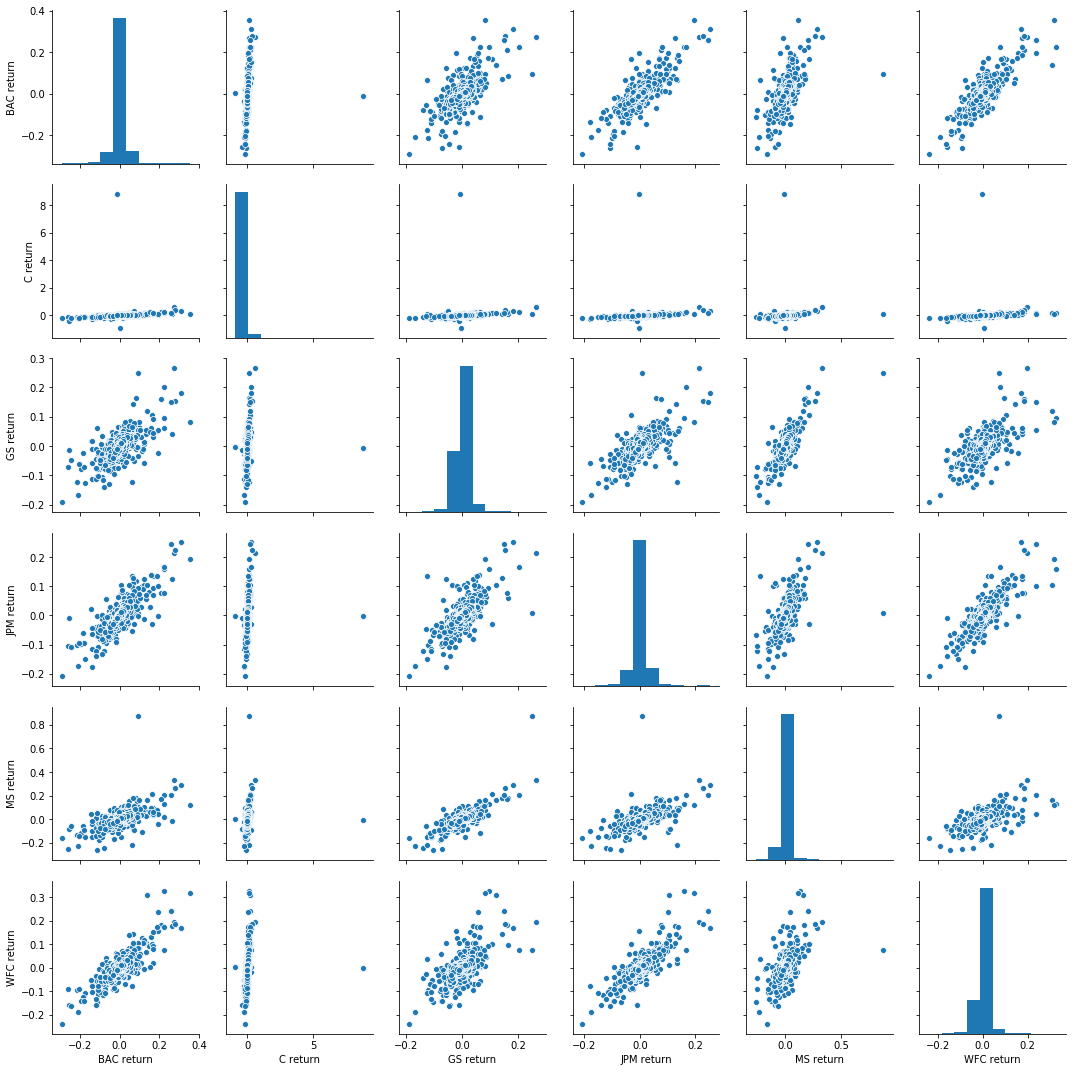

In [11]:
sns.pairplot(returns[1:])

In [12]:
returns.min()

BAC return   -0.289694
C return     -0.899107
GS return    -0.189596
JPM return   -0.207274
MS return    -0.258929
WFC return   -0.238223
dtype: float64

In [13]:
returns['BAC return'].argmin()

/home/arti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  """Entry point for launching an IPython kernel.


Timestamp('2009-01-20 00:00:00')

In [14]:
returns.idxmin()

BAC return   2009-01-20
C return     2011-05-06
GS return    2009-01-20
JPM return   2009-01-20
MS return    2008-10-09
WFC return   2009-01-20
dtype: datetime64[ns]

In [15]:
returns.idxmax()

BAC return   2009-04-09
C return     2011-05-09
GS return    2008-11-24
JPM return   2009-01-21
MS return    2008-10-13
WFC return   2008-07-16
dtype: datetime64[ns]

In [16]:
returns.std()

BAC return    0.036650
C return      0.179969
GS return     0.025346
JPM return    0.027656
MS return     0.037820
WFC return    0.030233
dtype: float64

In [17]:
returns['2015'].std()
#or you can do it like this:
#returns.iloc['2015-01-01':'2015-12-31'].std()

BAC return    0.016163
C return      0.015289
GS return     0.014046
JPM return    0.014017
MS return     0.016249
WFC return    0.012591
dtype: float64

/home/arti/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


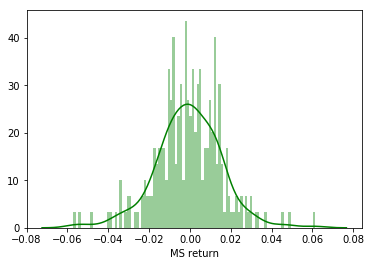

In [18]:
sns.distplot(returns['2015']['MS return'],color='green',bins=100)

/home/arti/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


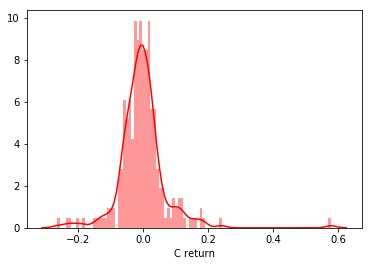

In [19]:
sns.distplot(returns['2008']['C return'],color ='red',bins=100)

In [32]:
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

#import plotly  and cufflinks
import plotly 
plotly.tools.set_credentials_file(username='jhaarti', api_key='3vZB89YYIZ1VXBlq09qA')

import cufflinks as cf
#cf.go_offline()

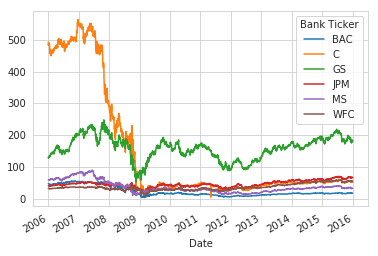

In [33]:
bank_stocks.xs(key='Close', axis=1 ,level= 'Stock Info').plot()

In [42]:
bank_stocks.xs(key='Close', level='Stock Info' , axis=1).iplot()

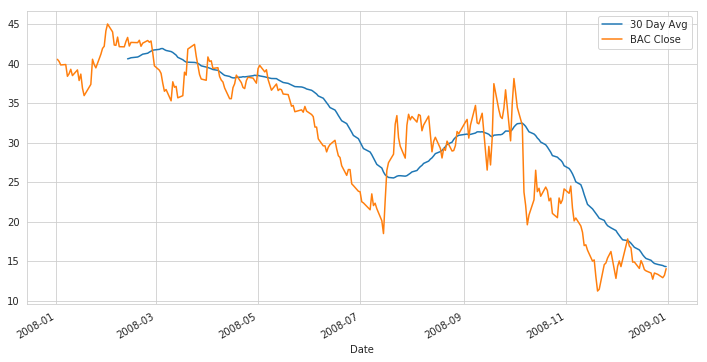

In [35]:
plt.figure(figsize=(12,6))
bank_stocks['BAC']['Close']['2008'].rolling(window=30).mean().plot(label='30 Day Avg')
bank_stocks['BAC']['Close']['2008'].plot(label='BAC Close')
plt.legend()

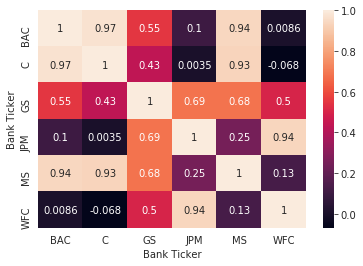

In [36]:
sns.heatmap(bank_stocks.xs(level = 'Stock Info', axis = 1, key='Close').corr(), annot=True)

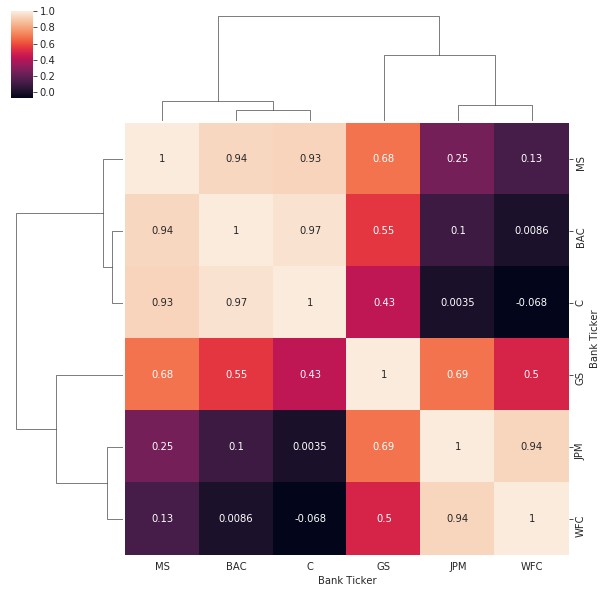

In [37]:
sns.clustermap(bank_stocks.xs(level = 'Stock Info', axis = 1, key='Close').corr(), annot=True)

In [38]:
Close_corr = bank_stocks.xs(key='Close', axis=1, level = 'Stock Info').corr()
Close_corr.iplot(kind='heatmap', colorscale= 'rdylbu')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jhaarti/0 or inside your plot.ly account where it is named 'Plotly Playground 2019-04-16 12:23:51'


In [39]:
bank_stocks['BAC'][['Open', 'High', 'Low', 'Close']]['2015'].iplot(kind='candle')


In [40]:
bank_stocks['MS']['Close']['2015'].ta_plot(study='sma', periods=[13,21,55], title='Simple Moving Averages')

In [41]:
bank_stocks['BAC']['Close']['2015'].ta_plot(study='boll', periods=[13,21,55], title='Simple Moving Averages')